# Project 1
### Moiya Josephs


## Ask

For your first project, you are asked to

1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

## Overview

For my first project I will be using Amazon electronic Data set reviews and analysing using network anaylis the difference between higher rated items versus lower rated items. I hypothesize that the items with the higher reviews will have more connections than the items that are lower rated.

### Key words:

Degree centrality: the number of edges a nodes has

Eigenvector:  used to measure the influence of a node and determine the most peripheral node in a network.

In [250]:
import networkx as nx
from networkx.algorithms import approximation as approx
import pandas as pd
import matplotlib.pyplot as plt


In [251]:
df = pd.read_csv('https://raw.githubusercontent.com/MengtingWan/marketBias/master/data/df_electronics.csv')

Here is a peak of the data and how it is structured. It has an item_id, a user_id, rating, timestamp of the rating, the gender of the item and brand.

In [252]:
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


## Data Exploration

For this analysis, I will use the rating, userid and item id.

(array([143755.,      0.,      0.,      0.,      0.,  78648.,      0.,
             0.,      0.,      0., 100630.,      0.,      0.,      0.,
             0., 214166.,      0.,      0.,      0., 755755.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 20 artists>)

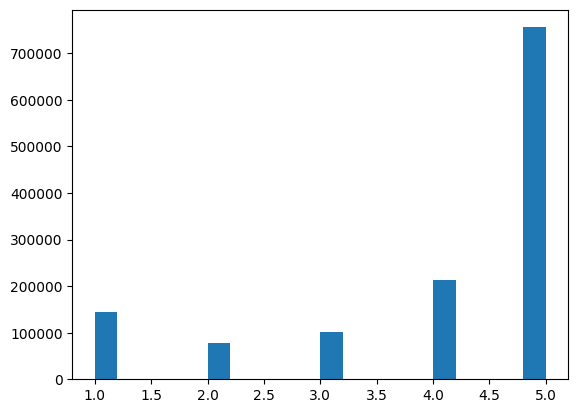

In [253]:
plt.hist(df['rating'], bins=20)

The most common rating in this dataset is 5. The rating 5 has over 700,000 votes. The second most common rating is 4 followed by the value 1.

(array([481171.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0., 382068.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0., 429715.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

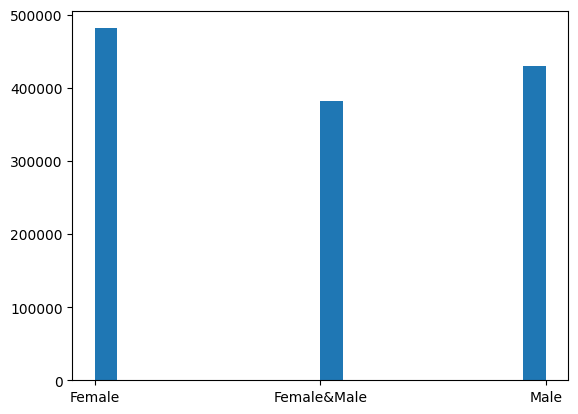

In [254]:
plt.hist(df['model_attr'], bins=20)

The distribution of gender categories in this dataset. There are more Female than male. The Female category has close to 500,000 items. The second most common category is Male, followed by Female & Male.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Portable Audio & Video'),
  Text(1, 0, 'Computers & Accessories'),
  Text(2, 0, 'Headphones'),
  Text(3, 0, 'Camera & Photo'),
  Text(4, 0, 'Television & Video'),
  Text(5, 0, 'Home Audio'),
  Text(6, 0, 'Accessories & Supplies'),
  Text(7, 0, 'Car Electronics & GPS'),
  Text(8, 0, 'Security & Surveillance'),
  Text(9, 0, 'Wearable Technology')])

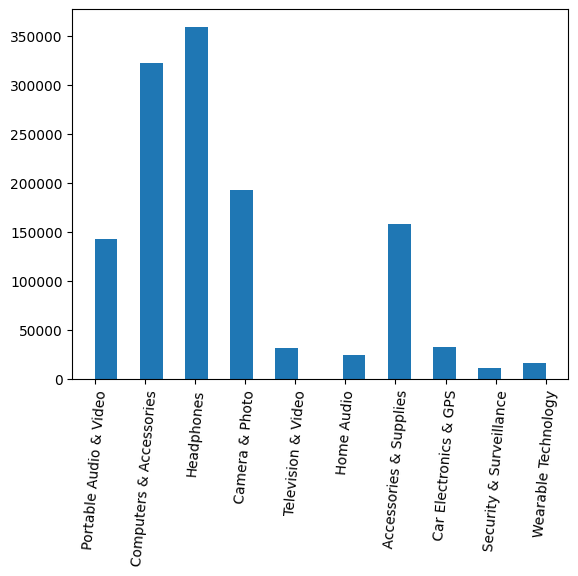

In [255]:
plt.hist(df['category'], bins=20)
plt.xticks(rotation=85)


The above graph shows the distribution of the categories in this dataset. The most common category is Headphones.

In [256]:
df_graph = df[['category', 'user_id', 'rating']]
G = nx.from_pandas_edgelist(df_graph, source= 'user_id', target='category', edge_attr='rating')


### Number of Edges

In [257]:
G.number_of_edges()

1242347

### Number of Nodes

In [258]:
G.number_of_nodes()

1157643

There are 1,157,633 nodes in this graph and 1,292,954 edges. This means there are 1,292,954 connections

### Degree Centrality

The distribution of the degree centrality is shown below. The degrees are right skewed.

In [259]:
G_degree_centrality = nx.degree_centrality(G)

In [260]:
G_degree_list = [*G_degree_centrality.values()]

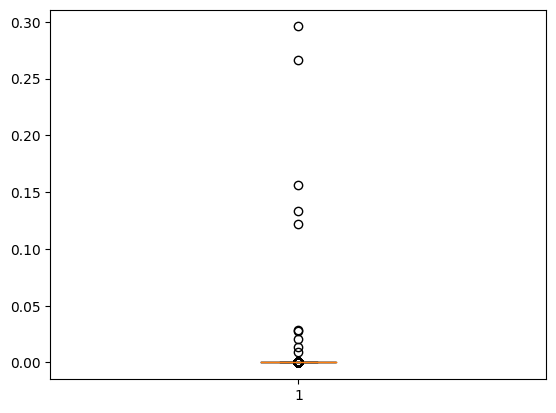

In [261]:
plt.boxplot(G_degree_list)
plt.show()

#### Maximum Degree Centrality

The category with the maximum degree centrality in the graph is Headphones.

In [262]:
max(G_degree_centrality, key=G_degree_centrality.get)


'Headphones'

## Split by Categorical Data
### Split by Ratings
One graph will be the ratings that are less than 3 and the other the items that are greater than and equal to 3.

I will create two dataframes dividing it by the ratings available. The `high_rating_df` contains the reviews where the ratings were greater than or equal to 3. The dataframe `low_rating_df` contains the reviews where the ratings were less than 3.

In [ ]:
high_rating_df = df[df['rating'] >= 3]
low_rating_df = df[df['rating'] < 3]


My hypotheses is that there is a statistical difference between the degree centrality in the high rating dataset than the low rating dataset.

In [ ]:
high_rating_graph = high_rating_df[['category', 'user_id', 'rating']]
low_rating_graph = low_rating_df[['category', 'user_id', 'rating']]

H = nx.from_pandas_edgelist(high_rating_graph, source= 'user_id', target='category', edge_attr='rating')
L = nx.from_pandas_edgelist(low_rating_graph, source= 'user_id', target='category', edge_attr='rating')

### The Number of Edges

In [ ]:
H.number_of_edges()

1030869

In [ ]:
L.number_of_edges()

220021

There are 1030869 edges in the high rating graph. The lower rating graph has 220021 edges.

### The Number of Nodes

In [ ]:
H.number_of_nodes()

963476

In [ ]:
L.number_of_nodes()

216796

The high rating graph has 963476 nodes and the low rating graph has 216796 nodes.

## High Graph

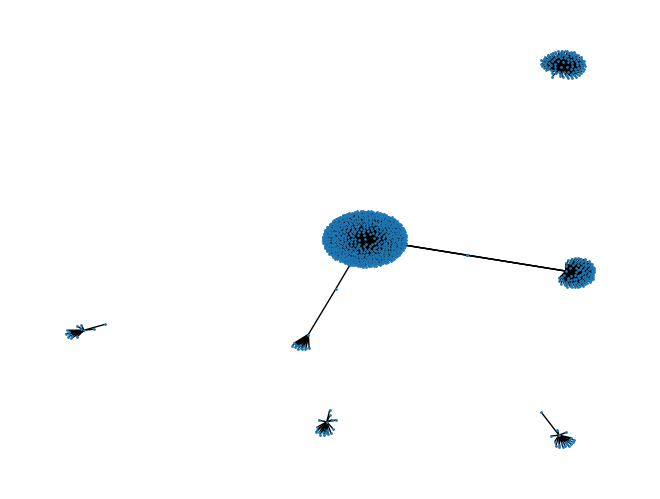

In [ ]:
H_subset = high_rating_graph.iloc[0:999]
H_subset_graph = nx.from_pandas_edgelist(H_subset, source= 'user_id', target='category', edge_attr='rating')
nx.draw(H_subset_graph, node_size=1)

### Degree Centrality

In [ ]:
H_degree_centrality = nx.degree_centrality(H)

In [ ]:
H_degree_list = [*H_degree_centrality.values()]

In [264]:
H_degree_centrality

{'Portable Audio & Video': 0.12314175251044397,
 0: 1.0379096499649706e-06,
 1: 1.0379096499649706e-06,
 2: 1.0379096499649706e-06,
 6: 1.0379096499649706e-06,
 8: 1.0379096499649706e-06,
 9: 1.0379096499649706e-06,
 12: 1.0379096499649706e-06,
 13: 1.0379096499649706e-06,
 'Computers & Accessories': 0.26891097329977426,
 14: 1.0379096499649706e-06,
 15: 1.0379096499649706e-06,
 'Headphones': 0.284119463400711,
 16: 1.0379096499649706e-06,
 17: 1.0379096499649706e-06,
 19: 1.0379096499649706e-06,
 20: 1.0379096499649706e-06,
 21: 1.0379096499649706e-06,
 23: 1.0379096499649706e-06,
 24: 1.0379096499649706e-06,
 25: 1.0379096499649706e-06,
 26: 1.0379096499649706e-06,
 27: 1.0379096499649706e-06,
 30: 1.0379096499649706e-06,
 31: 1.0379096499649706e-06,
 32: 1.0379096499649706e-06,
 33: 1.0379096499649706e-06,
 34: 1.0379096499649706e-06,
 35: 1.0379096499649706e-06,
 36: 1.0379096499649706e-06,
 37: 1.0379096499649706e-06,
 39: 1.0379096499649706e-06,
 40: 1.0379096499649706e-06,
 42: 

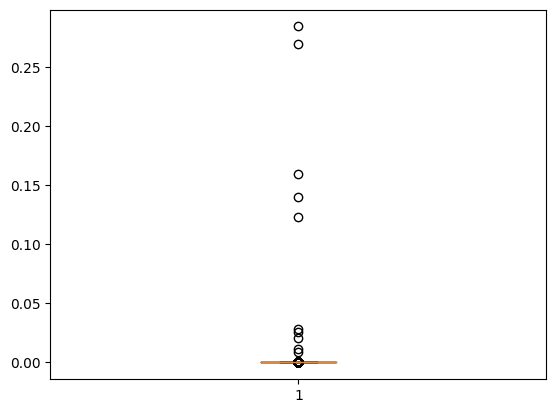

In [ ]:
plt.boxplot(H_degree_list)
plt.show()

#### Maximum Degree Centrality

The item with the largest Degree centrality that has the highest ratings is headphones.

In [ ]:
max(H_degree_centrality.items(), key=lambda k: k[1])


('Headphones', 0.284119463400711)

### Eigenvectors

Due to the size of the dataset, the Eigenvector took over 15 minutes to compute on my machine.

In [ ]:
nx.eigenvector_centrality(H, max_iter=H.size())

In [ ]:
H_eigenvector = nx.eigenvector_centrality(H, max_iter=H.size())

In [ ]:
H_eigen_list = [*H_eigenvector.values()]

## Low Ratings Graph

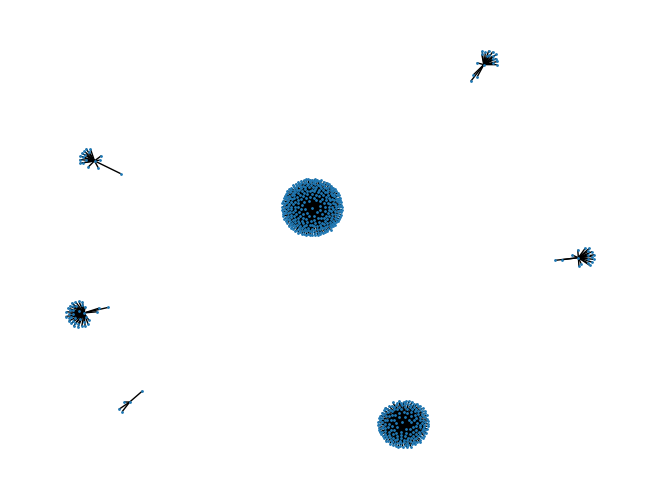

In [ ]:
L_subset = low_rating_graph.iloc[0:599]
L_subset_graph = nx.from_pandas_edgelist(L_subset, source= 'user_id', target='category', edge_attr='rating')
nx.draw(L_subset_graph, node_size=1)

### Degree Centrality

In [ ]:
L_degree_centrality = nx.degree_centrality(L)


In [ ]:
L_degree_list = [*L_degree_centrality.values()]

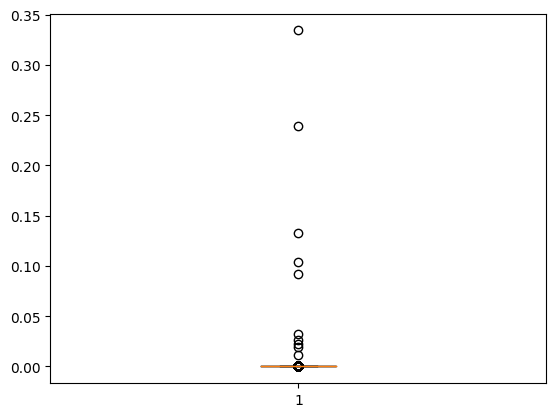

In [ ]:
plt.boxplot(L_degree_list)
plt.show()


The degree centrality is right skewed, and close to 0.

#### Maximum Degree Centrality

The item with the highest degree centrality is item with the ID 7780.

In [ ]:
max(L_degree_centrality.items(), key=lambda k: k[1])


('Headphones', 0.3342973777070504)

### Eigenvectors

At first the eigenvector formula failed due to how large the L graph was. I changed the parameter of max_iter based on the size of L.

In [ ]:
#nstart = {node: 1 for node in L.nodes()}
L_eigenvector = nx.eigenvector_centrality(L, max_iter=L.size())

In [ ]:
L_eigen_list = [*L_eigenvector.values()]

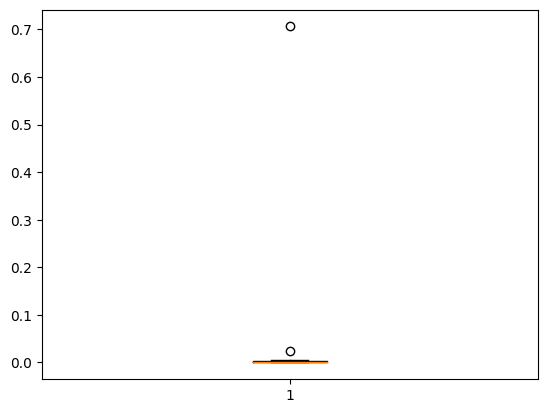

In [ ]:
plt.boxplot(L_eigen_list)
plt.show()

### Statistical Test


Whether the two samples data groups are independent.
Whether the data elements in respective groups follow any normal distribution.
Whether the given two samples have similar variances. This assumption is also known as the homogeneity assumption.

In [ ]:
from scipy import stats
import statsmodels.api as sm

res = stats.normaltest(L_degree_list)
res.statistic


1153860.4881720396

In [ ]:
from scipy.stats import shapiro


#perform Shapiro-Wilk test for normality
shapiro(L_degree_list)



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.00044614076614379883, pvalue=0.0)

In [ ]:
from scipy.stats import kstest



#perform Kolmogorov-Smirnov test for normality
kstest(L_degree_list, 'norm')


KstestResult(statistic=0.5000018401821094, pvalue=0.0, statistic_location=4.6126525058234734e-06, statistic_sign=-1)

Since the p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.

This means we have sufficient evidence to say that the sample data does not come from a normal distribution. Therefore I cannot use the t-test to test for a statistical difference between the two degree centralities.

https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/

## Conclusion

It was hard to generaye the complete graph since the data was so large. Betweeness functions also took a long time to process. Since the degree centralities were not normally ditributed, I could not perform a t-test. In future iterations of this project I would utilized statistical testing for non normal distributions and how to properly subset the data.

Based on a naive analysis (without a statistical test), the item maximum degree centrality was the same in the high rating graph and the low rating graph. Additionally, the item with the smallest degree centrality was the different in the high rating graph and the low rating graph. The degree centrality in the higher ratings had a wider range than the degree centrality of the lower ratings. It was difficult to compare the eigenvectors due to the size of the dataset.